In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("train.csv")
test_df = pd.read_csv("test.csv")

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

In [4]:
df.isna().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

In [5]:
df.describe()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,2000.000000,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,...,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,0.4950,1.522250,0.509500,4.309500,0.521500,32.046500,0.501750,140.249000,4.520500,...,645.108000,1251.515500,2124.213000,12.306500,5.767000,11.011000,0.761500,0.503000,0.507000,1.500000
std,439.418206,0.5001,0.816004,0.500035,4.341444,0.499662,18.145715,0.288416,35.399655,2.287837,...,443.780811,432.199447,1084.732044,4.213245,4.356398,5.463955,0.426273,0.500116,0.500076,1.118314
min,501.000000,0.0000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,...,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,851.750000,0.0000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,...,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000,0.750000
50%,1226.000000,0.0000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,...,564.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000,1.500000
75%,1615.250000,1.0000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,...,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,2.250000
max,1998.000000,1.0000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,...,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000


In [6]:
df.shape

(2000, 21)

In [7]:
train_features = df.iloc[:, :-1].values
train_label = df.iloc[:, 1].values

In [8]:
train_label

array([0, 1, 1, ..., 0, 0, 1], dtype=int64)

In [9]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
train_set = sc.fit_transform(train_features)

In [10]:
train_set

array([[-0.90259726, -0.9900495 ,  0.83077942, ..., -1.78686097,
        -1.00601811,  0.98609664],
       [-0.49513857,  1.0100505 , -1.2530642 , ...,  0.55964063,
         0.99401789, -1.01409939],
       [-1.5376865 ,  1.0100505 , -1.2530642 , ...,  0.55964063,
         0.99401789, -1.01409939],
       ...,
       [ 1.53077336, -0.9900495 , -0.76274805, ...,  0.55964063,
         0.99401789, -1.01409939],
       [ 0.62252745, -0.9900495 , -0.76274805, ...,  0.55964063,
         0.99401789,  0.98609664],
       [-1.65833069,  1.0100505 ,  0.58562134, ...,  0.55964063,
         0.99401789,  0.98609664]])

In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(4, activation='softmax')
])

In [ ]:
# model.compile(
#     loss="sparse_categorical_crossentropy",
#     optimizer=tf.keras.optimizers.Adam(0.03),
#     metrics=['accuracy']
# )

In [ ]:
model.compile(optimizer=tf.keras.optimizers.Adam(0.001), loss="sparse_categorical_crossentropy", metrics=['accuracy'])

In [ ]:
# model.summary()

In [ ]:
history = model.fit(train_set, train_label,  validation_split=0.2,epochs=100)

Epoch 1/100
50/50 [==============================] - 3s 14ms/step - loss: 0.2705 - accuracy: 0.9169 - val_loss: 0.0021 - val_accuracy: 1.0000
Epoch 2/100
50/50 [==============================] - 0s 5ms/step - loss: 7.3607e-04 - accuracy: 1.0000 - val_loss: 5.3842e-04 - val_accuracy: 1.0000
Epoch 3/100
50/50 [==============================] - 0s 5ms/step - loss: 2.8560e-04 - accuracy: 1.0000 - val_loss: 3.2733e-04 - val_accuracy: 1.0000
Epoch 4/100
50/50 [==============================] - 0s 5ms/step - loss: 1.8326e-04 - accuracy: 1.0000 - val_loss: 2.2482e-04 - val_accuracy: 1.0000
Epoch 5/100
50/50 [==============================] - 0s 5ms/step - loss: 1.2836e-04 - accuracy: 1.0000 - val_loss: 1.6727e-04 - val_accuracy: 1.0000
Epoch 6/100
50/50 [==============================] - 0s 5ms/step - loss: 9.4929e-05 - accuracy: 1.0000 - val_loss: 1.2790e-04 - val_accuracy: 1.0000
Epoch 7/100
50/50 [==============================] - 0s 5ms/step - loss: 7.2665e-05 - accuracy: 1.0000 - val_loss

In [268]:
history.history

{'loss': [0.2587198317050934,
  0.0006264320109039545,
  0.00028188122087158263,
  0.00018318029469810426,
  0.00013113308523315936,
  9.078100265469402e-05,
  6.098042649682611e-05,
  3.97806397813838e-05,
  2.7279485948383808e-05,
  1.937316483235918e-05,
  1.4675482816528529e-05,
  1.1501401786517818e-05,
  9.33844148676144e-06,
  7.714060302532744e-06,
  6.51868867862504e-06,
  5.59404452360468e-06,
  4.854609869653359e-06,
  4.2566543925204314e-06,
  3.768509714063839e-06,
  3.359783704581787e-06,
  3.018483766936697e-06,
  2.72330044026603e-06,
  2.4740102162468247e-06,
  2.2548190372617682e-06,
  2.063491592707578e-06,
  1.896527351163968e-06,
  1.7472207218816038e-06,
  1.6172100458788918e-06,
  1.49897130086174e-06,
  1.3930251725469134e-06,
  1.2992983329240815e-06,
  1.2125001376261935e-06,
  1.1358346228007576e-06,
  1.064235448211548e-06,
  9.991922524932306e-07,
  9.404822662872903e-07,
  8.864660117069434e-07,
  8.358025525012636e-07,
  7.894603868408012e-07,
  7.4572562

In [269]:
model.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_36 (Dense)            (None, 128)               2688      
                                                                 
 dense_37 (Dense)            (None, 256)               33024     
                                                                 
 dense_38 (Dense)            (None, 256)               65792     
                                                                 
 dense_39 (Dense)            (None, 4)                 1028      
                                                                 
Total params: 102,532
Trainable params: 102,532
Non-trainable params: 0
_________________________________________________________________


In [270]:
def plot_loss(history):
  plt.plot(history.history['loss'], label='loss')
  plt.plot(history.history['val_loss'], label='val_loss')
  plt.ylim([0, 10])
  plt.xlabel('Epoch')
  plt.ylabel('Error [MPG]')
  plt.legend()
  plt.grid(True)

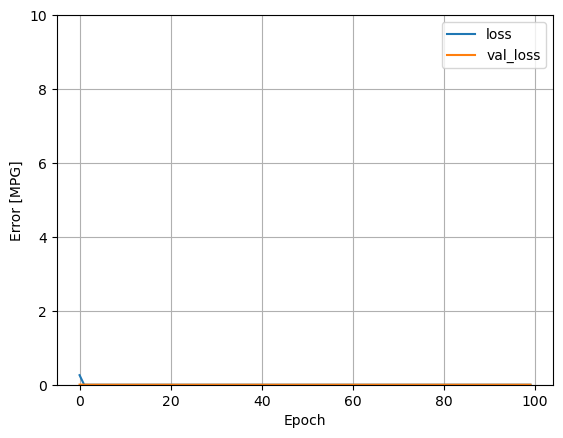

In [271]:
plot_loss(history)

In [272]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             1000 non-null   int64  
 1   battery_power  1000 non-null   int64  
 2   blue           1000 non-null   int64  
 3   clock_speed    1000 non-null   float64
 4   dual_sim       1000 non-null   int64  
 5   fc             1000 non-null   int64  
 6   four_g         1000 non-null   int64  
 7   int_memory     1000 non-null   int64  
 8   m_dep          1000 non-null   float64
 9   mobile_wt      1000 non-null   int64  
 10  n_cores        1000 non-null   int64  
 11  pc             1000 non-null   int64  
 12  px_height      1000 non-null   int64  
 13  px_width       1000 non-null   int64  
 14  ram            1000 non-null   int64  
 15  sc_h           1000 non-null   int64  
 16  sc_w           1000 non-null   int64  
 17  talk_time      1000 non-null   int64  
 18  three_g  

In [273]:
test_set = test_df.iloc[:, 1:].values

In [274]:
test_set.shape

(1000, 20)

In [275]:
test_set = sc.fit_transform(test_set)

In [276]:
test_set

array([[-0.47545131,  0.968496  ,  0.31260069, ..., -1.76021608,
         1.        , -1.01409939],
       [-0.94278218,  0.968496  , -1.25583195, ...,  0.56811207,
        -1.        , -1.01409939],
       [ 1.29207729,  0.968496  ,  1.51908734, ..., -1.76021608,
         1.        ,  0.98609664],
       ...,
       [-0.1469316 , -1.03252879, -0.16999397, ...,  0.56811207,
        -1.        , -1.01409939],
       [ 0.65817305,  0.968496  , -1.25583195, ..., -1.76021608,
         1.        , -1.01409939],
       [ 0.04971753,  0.968496  , -1.25583195, ...,  0.56811207,
        -1.        ,  0.98609664]])

In [277]:
y_pred = model.predict(test_set)

32/32 [==============================] - 0s 4ms/step


In [278]:
y_pred

array([[1.6583795e-10, 1.0000000e+00, 1.0335575e-11, 3.5080300e-11],
       [4.0096147e-06, 9.9999583e-01, 5.2151748e-08, 9.8373043e-08],
       [1.6060344e-08, 1.0000000e+00, 5.2091470e-10, 1.6410084e-09],
       ...,
       [1.0000000e+00, 1.7088835e-09, 6.0390060e-10, 9.2956293e-10],
       [1.1416844e-09, 1.0000000e+00, 6.3488416e-11, 1.4977268e-10],
       [1.1748433e-07, 9.9999988e-01, 2.4336181e-08, 4.1534147e-08]],
      dtype=float32)

In [279]:
# # saving the dataframe
# y_pred.to_csv('file1.csv')

(2000, 20)